In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.io
import pandas as pd

import matplotlib.style as style 
from matplotlib.offsetbox import AnchoredText
from context_helper import folders

sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.patches as patches
from scipy.interpolate import UnivariateSpline
%matplotlib inline 
%autosave 5

Autosaving every 5 seconds


In [2]:
import argparse
parser=argparse.ArgumentParser()
parser.add_argument('--story', type=str)

args = parser.parse_args(args=['--story', 'tunnel'])

In [175]:
home_dir = folders['desk']
pod_name=args.story
datum_dir='/Users/manojkumar/Research/context-prediction/datum/podcast/%s/' % pod_name

results_dir='/Users/manojkumar/Research/context-prediction/outputs/'
model = 'GPT2'
results_dir_model= home_dir + 'outputs/' + '%s/' % model

In [176]:
file=datum_dir +'%s_button_data.csv' % pod_name
df=pd.read_csv(file, header=None)

In [177]:
data=df.to_numpy()

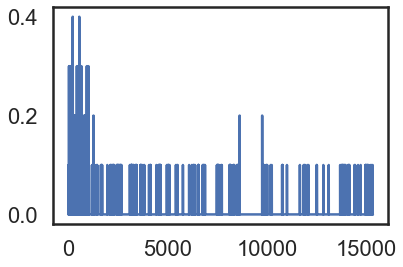

In [178]:
plt.plot(np.mean(data,axis=0))

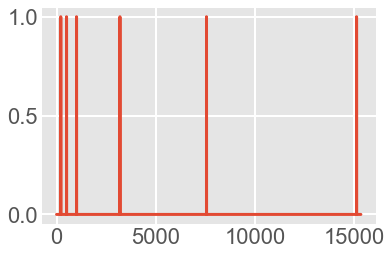

In [180]:
plt.plot(data[9,:])

In [181]:
event_win=10
press_time=data.T
for n in range(press_time.shape[1]):  # For number of subjects in that part.
    indx=np.where(press_time[:,n]==1)
    #print(indx)
    #print(indx[0]-500, indx[0]+500)
    points=indx[0].shape[0]
    for p in range(points):
        press_time[indx[0][p]-event_win:indx[0][p]+event_win,n]=1

In [184]:
def set_button_press_for_window(press_time):
    event_win=10
    for n in range(press_time.shape[1]):  # For number of subjects in that part.
        indx=np.where(press_time[:,n]==1)
        #print(indx)
        #print(indx[0]-500, indx[0]+500)
        points=indx[0].shape[0]
        for p in range(points):
            press_time[indx[0][p]-event_win:indx[0][p]+event_win,n]=1
    plt.plot(press_time)
    button_press=np.mean(press_time, axis=1)
    
    return button_press


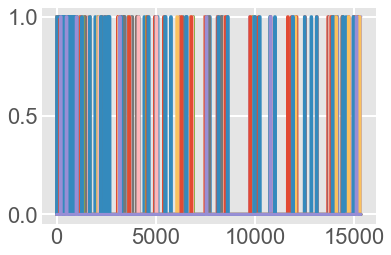

In [182]:
button_press=set_button_press_for_window(data.T)


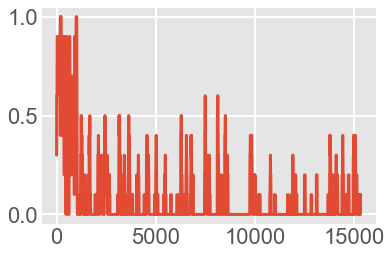

In [183]:
plt.plot(button_press)

In [185]:
import scipy.signal as signal

In [188]:
from scipy.ndimage import gaussian_filter1d as gf1d

In [189]:
win=2
button_press_smg=gf1d(button_press, win)

<AxesSubplot:>

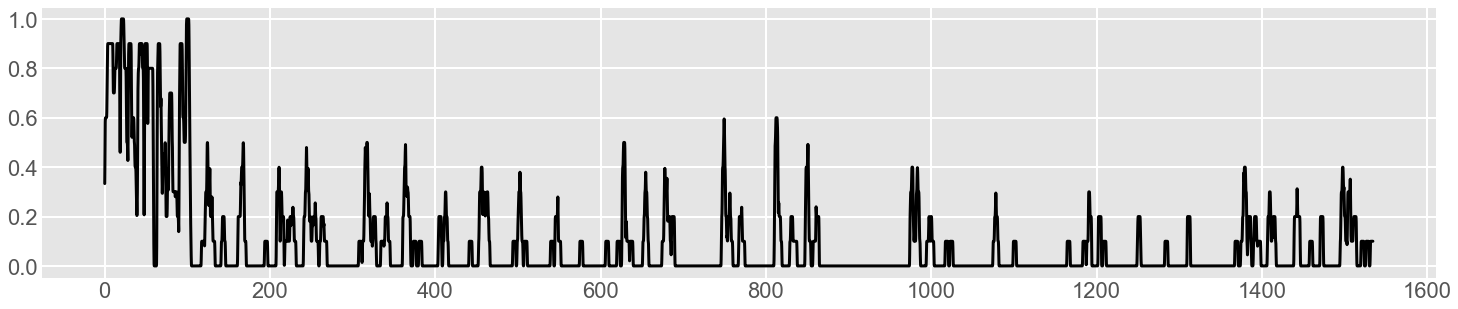

In [190]:
plt.figure(figsize=[25,5])
xt= np.arange(0,len(button_press_smg))
sns.lineplot(x=xt/10,y=button_press_smg, color='black', ci=None )


In [192]:

df_button=pd.DataFrame()
df_button[pod_name]=button_press_smg
df_button.to_csv(results_dir + '%s_button_gaussian.csv' % pod_name)